In [1]:
%config IPCompleter.greedy=True
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
def tsne_plot_3d(title, label, embeddings, a=1):
    fig = plt.figure()
    ax = Axes3D(fig)
    colors = cm.rainbow(np.linspace(0, 1, 1))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], c=colors, alpha=a, label=label)
    plt.legend(loc=4)
    plt.title(title)
    plt.show()

In [3]:
def tsne_plot_2d(label, embeddings, words=[], a=1):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=label)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.3, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig("hhh.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()

In [4]:
model = Doc2Vec.load("../doc2vec/doc2vec-30ep.mdl")

In [28]:
model.docvecs.vectors_docs

array([[ 0.17492057,  0.16932964, -0.5797612 , ...,  0.13031095,
         0.28438246, -0.0051509 ],
       [-0.11102954, -0.14310718,  0.17658663, ...,  0.263885  ,
         0.2278777 ,  0.51143277],
       [-0.1375823 , -0.19477084, -0.5855034 , ...,  0.35482192,
         0.02897211,  0.30963916],
       ...,
       [-0.20889154, -0.01962064, -0.31501538, ...,  0.36604795,
        -0.37003556,  0.04620722],
       [-0.56330323,  0.12516548,  1.5133295 , ...,  0.83812773,
        -0.8325936 ,  0.31198063],
       [-1.4843495 , -0.6729222 , -0.81446517, ...,  1.7122462 ,
         0.30800995,  1.1414614 ]], dtype=float32)

In [32]:
docs = []
embeddings = []



for doc in model.docvecs.vectors_docs:
    embeddings.append(doc)


In [34]:
len(embeddings)

1186028

c:\users\david\appdata\local\programs\python\python37\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


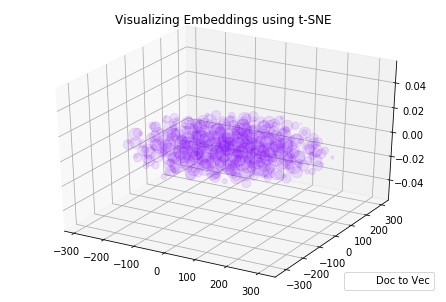

In [48]:
tsne_3d = TSNE(perplexity=30, n_components=3, init='pca', n_iter=3500, random_state=12)
embeddings_3d = tsne_3d.fit_transform(embeddings[:1000])
tsne_plot_3d('Visualizing Embeddings using t-SNE', 'Doc to Vec', embeddings_3d, a=0.1)

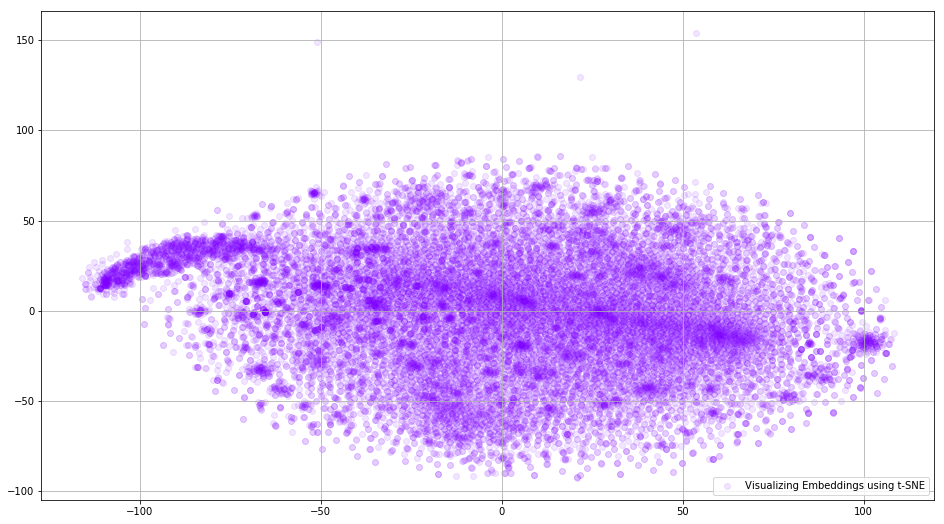

In [47]:
tsne_ak_2d = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_ak_2d = tsne_ak_2d.fit_transform(embeddings[100000:120000])
tsne_plot_2d('Visualizing Embeddings using t-SNE', embeddings_ak_2d, a=0.1)

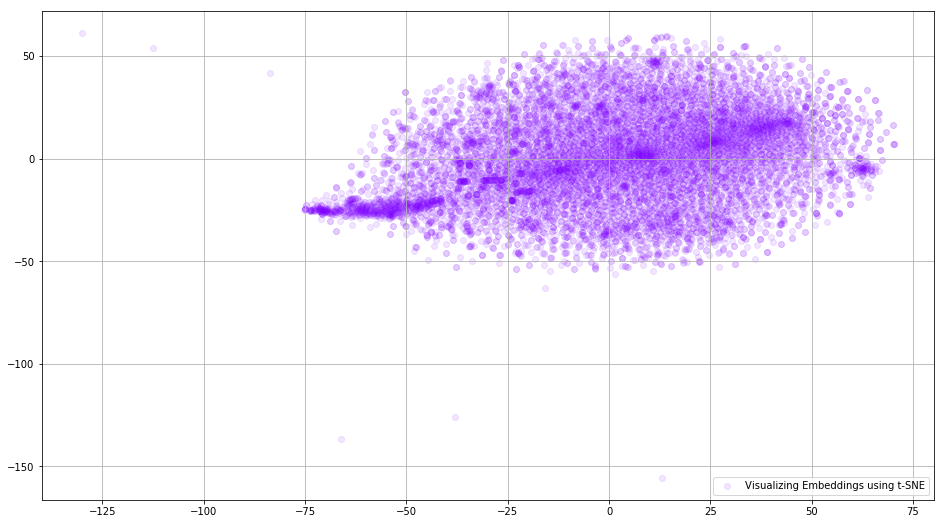

In [45]:
tsne_ak_2d = TSNE(perplexity=40, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_ak_2d = tsne_ak_2d.fit_transform(embeddings[:10000])
tsne_plot_2d('Visualizing Embeddings using t-SNE', embeddings_ak_2d, a=0.1)